# Climate-Friendly Food Systems (CFFS) Labelling Project

### The University of British Columbia

***

## Part IV: Data Analysis

## Set up and Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import xml.etree.ElementTree as et
from xml.etree.ElementTree import parse
from datetime import datetime

In [2]:
# RUN ONLY ONCE
# os.chdir is used to change the current directory to the specified path
os.chdir("../") # Sets path to the repo folder as it is one level above where this file exists!
path = os.getcwd()
print(path)

/Users/vivaanwadhwa/Documents/GitHub/CFFS_sharon_2024


***
## Import Cleaned Datasets

In [3]:
"""
INPUT: a Dataframe
OUPUT: NONE
Description: Prints a description of the datasets
"""
def DescribeDataset(df):
    print(df.dtypes)
    print("\nShape: ", df.shape)
    display(df.head())

In [4]:
Items = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "AMS_data", "Items_List.csv"))
DescribeDataset(Items)

ItemId             object
Description        object
CaseQty           float64
CaseUOM            object
PakQty            float64
PakUOM             object
InventoryGroup     object
dtype: object

Shape:  (79, 7)


,ItemId,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup
0,I-4099,Olive Oil 100 Pct,60.0,ml,14.0,ea,Y
1,I-2402,TOMATO - 6 X 7 MED,300.0,g,14.0,ea,Y
2,I-1874,GARLIC WHOLE PEELED,15.0,g,1031.0,g,Y
3,I-4091,SALT KOSHER COARSE,15.0,g,1031.0,g,Y
4,I-4104,CHICKEN BRST 6Z B/S 19% IQF,6.0,oz (wt),1.0,ea,Y


In [5]:
Ingredients = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "AMS_data", "Ingredients_List.csv"))
DescribeDataset(Ingredients)

IngredientId     object
Qty             float64
Uom              object
Recipe           object
dtype: object

Shape:  (152, 4)


,IngredientId,Qty,Uom,Recipe
0,I-4099,60.0,ml,P-2824
1,I-2402,300.0,g,P-2824
2,P-9935,14.0,ea,P-2824
3,I-4104,6.0,oz (wt),P-5012
4,P-5506,50.0,g,P-5012


In [6]:
Preps = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "AMS_data", "Preps_List_Cleaned.csv"))
DescribeDataset(Preps)

PrepId             object
Description        object
PakQty            float64
PakUOM             object
InventoryGroup     object
StdQty            float64
StdUom             object
dtype: object

Shape:  (4, 7)


,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom
0,P-2679,Pro - Tahini Sauce,1.0,L,Y,1000.0,ml
1,P-15427,Pro - Vegan Chipotle Mayo,16.5,L,Y,16500.0,ml
2,P-7912,BCPrep - Baked Eggs for Wraps,4.3,Kg,Y,4300.0,g
3,P-14403,Prep Cream Cheese - Garlic,11000.0,g,Y,450.0,g


In [7]:
Products = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "AMS_data", "Products_List.csv"))
DescribeDataset(Products)

ProdId                                   object
Description                              object
SalesGroup                               object
Weight (g)                              float64
GHG Emission (g)                        float64
N lost (g)                              float64
Land Use (m^2)                          float64
Freshwater Withdrawals (L)              float64
Stress-Weighted Water Use (L)           float64
GHG Emission (g) / 100g                 float64
N lost (g) / 100g                       float64
Freshwater Withdrawals (L) / 100g       float64
Stress-Weighted Water Use (L) / 100g    float64
Land Use (m^2) / 100g                   float64
dtype: object

Shape:  (33, 14)


,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g
0,R-4593,$garlic & onion,Y,50.00,7802.796944,32.354278,8.720772,32.37,33897.73,15605.59,64.71,64.74,67795.46,17.44
1,R-3266,CHEDDAR SLICE,Y,21.00,187.118399,1.959300,0.219660,32.75,1689.73,891.04,9.33,155.95,8046.33,1.05
2,R-9348,Cucumber,Y,30.15,282.514545,0.203512,0.934650,0.75,6.64,937.03,0.68,2.49,22.02,3.10
3,R-9085,Lettuce,Y,28.35,17.633700,0.223965,0.065205,1.55,70.40,62.20,0.79,5.47,248.32,0.23
4,R-2489,Tomato,Y,50.00,48.670000,0.337500,0.087000,2.19,17.48,97.34,0.68,4.38,34.96,0.17


In [8]:
Conversions = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "AMS_data", "Conversions_Added.csv"))
DescribeDataset(Conversions)

ConversionId       object
Multiplier        float64
ConvertFromQty    float64
ConvertFromUom     object
ConvertToQty      float64
ConvertToUom       object
dtype: object

Shape:  (195, 6)


,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,I-1971,0.003731,0.25,ea,16.75,g
1,I-15803,0.004000,1.00,can,250.00,ml
2,I-5505,0.001263,0.25,HEAD,49.50,g
3,I-11706,0.008547,1.00,ea,117.00,g
4,I-13308,0.024540,1.00,ea,40.75,g


In [9]:
mapping = pd.read_csv(os.path.join(os.getcwd(), "data", "mapping", "AMS_data", "Mapping.csv"))
DescribeDataset(mapping)

ItemId                                                     object
CategoryID                                                  int64
Description                                                object
CaseQty                                                   float64
CaseUOM                                                    object
PakQty                                                    float64
PakUOM                                                     object
InventoryGroup                                             object
Food Category_y                                            object
Active Total Supply Chain Emissions (kg CO2 / kg food)    float64
g N lost/kg product                                       float64
Land Use (m^2)                                            float64
Freshwater Withdrawals (L/FU)                             float64
Stress-Weighted Water Use (L/FU)                          float64
dtype: object

Shape:  (566, 14)


,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
0,I-1971,35,LIMES,0.25,ea,1.0,ea,N,citrus fruit,0.3942,2.70,0.00042,37.400,1345.500
1,I-8228,55,Grey Goose 1.14L,1.00,fl oz,1.0,fl oz,N,water & beverages,0.0000,0.00,0.00000,1.000,1.000
2,I-15803,31,Red Bull Watermelon,1.00,can,1.0,can,N,other fruits,0.4306,2.70,0.00071,3.500,4.700
3,I-5505,36,Lettuce - Romaine,0.25,HEAD,1.0,HEAD,N,cabbages and other brassicas (broccoli),0.6220,7.90,0.00230,54.500,2483.400
4,I-8667,58,ITEM GARLIC MAYO,2.00,fl oz,1.0,ml,N,sauces & paste,0.0000,6.75,0.00000,20.225,1134.925


In [10]:
# Check if there are any duplicates in the mapping dataframe, "ItemId" column? False is good.
check = mapping["ItemId"].duplicated().any()
check

False

In [11]:
mapping.loc[mapping["ItemId"] == 'I-2324']

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
39,I-2324,54,SPICE CHILI POWDER,80.0,g,110.0,g,Y,stimulants & spices misc.,9.3703,6.75,0.031,24.9,220.3


### Unit Converter

In [12]:
# Import standard unit conversion information for items
Std_Unit = pd.read_csv(os.path.join(os.getcwd(), "data", "external", "standard_conversions.csv"))
Std_Unit.head()

,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,4.92890,1,tsp,4.92890,ml
1,14.78700,1,Tbsp,14.78700,ml
2,946.35000,1,qt,946.35000,ml
3,473.17625,1,pt,473.17625,ml
4,28.34950,1,oz,28.34950,g


In [13]:
# Import list of prep that need convert uom to standard uom manually
Manual_PrepU = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "update", "AMS_data", "Preps_UpdateUom.csv"))
Manual_PrepU

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom
0,P-14356,[PREP KAPPA MAKI,6.0,PORT,N,1511.82,g
1,P-14560,2023 Chicken Caesar wrap Prep,1.0,ea,Y,433.59,g
2,P-9003,2022 Gallery Burger prep,1.0,ea,N,501.82,g
3,P-17358,2023 Poutine Prep,1.0,ea,N,705.80,g
4,P-15006,2023 Power Punch Salad Prep,1.0,ea,N,416.73,g
...,...,...,...,...,...,...,...
103,P-9279,BCPrep - Salsa Wrap,1.0,ea,Y,318.00,g
104,P-10863,BCPrep - T-Bird Muffin,1.0,ea,Y,162.50,g
105,P-1434,BCPrep - Turkey & Cheddar,1.0,ea,Y,310.00,g
106,P-10195,BCPrep - Vegan Egg Muffin,10.0,ea,Y,1935.00,g


In [14]:
# NEW CELL ADDED NOV 21 
# For future iterations: Make sure Manual_PrepU has updated units of measurement.
# concatenate Manual_PrepU with Preps:
Preps = pd.concat([Manual_PrepU, Preps], ignore_index=True)

In [15]:
Preps.to_csv("yo.csv", index=False)

In [16]:
# Add unit conversion info for preps into converter
Prep_cov = Manual_PrepU[['PrepId', 'PakQty','PakUOM','StdQty','StdUom']]
Prep_cov.insert(1, "Multiplier", '')
Prep_cov.columns = Conversions.columns

# Prep_cov.loc['Multiplier'] = Prep_cov['ConvertFromQty']/Prep_cov['ConvertToQty']
for index, row in Prep_cov.iterrows():
    # print(Prep_cov.loc[index, 'ConvertFromQty'])
    Prep_cov.loc[index, 'Multiplier'] = Prep_cov.loc[index, 'ConvertFromQty']/Prep_cov.loc[index, 'ConvertToQty']
Prep_cov.head()
Prep_cov.tail()


,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
103,P-9279,0.003145,1.0,ea,318.0,g
104,P-10863,0.006154,1.0,ea,162.5,g
105,P-1434,0.003226,1.0,ea,310.0,g
106,P-10195,0.005168,10.0,ea,1935.0,g
107,P-8359,0.002646,10.0,ea,3780.0,g


In [17]:
# Drop duplicates and concatenate DataFrames: Conversions and Prep_cov to make a DataFrame: frames
frames = [Conversions, Prep_cov]
Conversions = pd.concat(frames).reset_index(drop=True, inplace=False).drop_duplicates()
Conversions.tail()

,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
298,P-9279,0.003145,1.0,ea,318.0,g
299,P-10863,0.006154,1.0,ea,162.5,g
300,P-1434,0.003226,1.0,ea,310.0,g
301,P-10195,0.005168,10.0,ea,1935.0,g
302,P-8359,0.002646,10.0,ea,3780.0,g


In [18]:
# Seperate uoms that converted to 'ml' or 'g'
liquid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'ml', 'ConvertFromUom'].tolist()
solid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'g', 'ConvertFromUom'].tolist()

In [19]:
# Construct a standard unit converter
def std_converter(qty, uom):
    if uom in Std_Unit['ConvertFromUom'].tolist():
        multiplier = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'Multiplier']
        Qty = float(qty)*float(multiplier.iloc[0])
        Uom = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'ConvertToUom'].values[0]
    else:
        Qty = qty
        Uom = uom
    return (Qty, Uom)

In [20]:
# Construct a unit converter for specific items
spc_cov = list(filter(None, Conversions['ConversionId'].tolist()))
 
def spc_converter(ingre, qty, uom):
    if uom in liquid_unit + solid_unit:
        return std_converter(qty, uom)
    elif ingre in spc_cov:
        conversion = Conversions.loc[(Conversions['ConversionId'] == ingre) & (Conversions['ConvertFromUom'] == uom)
                                    & (Conversions['ConvertToUom'] == 'g')]
        conversion = conversion[conversion['Multiplier'] != 0]

        conversion.drop_duplicates(subset=['ConversionId'], inplace=True)
        multiplier = conversion['Multiplier']
        if multiplier.empty:
            return std_converter(qty, uom)
        else: 
            Qty = float(qty)/float(multiplier.iloc[0])
            Uom = conversion['ConvertToUom'].values[0]
            return (Qty, Uom)
    else:
        return std_converter(qty, uom)

In [21]:
# Test the spc_converter
spc_converter('I-1971', 1, 'g')

(1, 'g')

In [22]:
spc_converter('P-35132', 1, 'ea')

(1, 'ea')

## GHG Factors Calculation for Preps

In [23]:
# Created new columns with emissions factors
Preps['GHG Emission (g)'] = 0
Preps['GHG Emission(g)/StdUom'] = 0
Preps['N lost (g)'] = 0
Preps['N lost (g)/StdUom'] = 0
Preps['Freshwater Withdrawals (ml)'] = 0
Preps['Freshwater Withdrawals (ml)/StdUom'] = 0
Preps['Stress-Weighted Water Use (ml)'] = 0
Preps['Stress-Weighted Water Use (ml)/StdUom'] = 0
Preps['Land Use (m^2)'] = 0
Preps['Land Use (m^2)/StdUom'] = 0

In [24]:
Ingredients.head()

,IngredientId,Qty,Uom,Recipe
0,I-4099,60.0,ml,P-2824
1,I-2402,300.0,g,P-2824
2,P-9935,14.0,ea,P-2824
3,I-4104,6.0,oz (wt),P-5012
4,P-5506,50.0,g,P-5012


In [25]:
Preps.loc[Preps["PrepId"] == "P-67984"]

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom


In [26]:
Preps.head()

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom
0,P-14356,[PREP KAPPA MAKI,6.0,PORT,N,1511.82,g,0,0,0,0,0,0,0,0,0,0
1,P-14560,2023 Chicken Caesar wrap Prep,1.0,ea,Y,433.59,g,0,0,0,0,0,0,0,0,0,0
2,P-9003,2022 Gallery Burger prep,1.0,ea,N,501.82,g,0,0,0,0,0,0,0,0,0,0
3,P-17358,2023 Poutine Prep,1.0,ea,N,705.80,g,0,0,0,0,0,0,0,0,0,0
4,P-15006,2023 Power Punch Salad Prep,1.0,ea,N,416.73,g,0,0,0,0,0,0,0,0,0,0


In [27]:
Preps.to_csv("yo.csv", index=False)

In [28]:
# Changed on Nov 21 2023
def get_items_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    land = Preps.loc[index, "Land Use (m^2)"]

    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx, 'IngredientId']
        if ingre.startswith('I'):
            ghge_series = mapping.loc[mapping['ItemId'] == ingre, 'Active Total Supply Chain Emissions (kg CO2 / kg food)']
            nitro_fac_series = mapping.loc[mapping['ItemId'] == ingre, 'g N lost/kg product']
            water_fac_series = mapping.loc[mapping['ItemId'] == ingre, 'Freshwater Withdrawals (L/FU)']
            str_water_fac_series = mapping.loc[mapping['ItemId'] == ingre, 'Stress-Weighted Water Use (L/FU)']
            land_fac_series = mapping.loc[mapping["ItemId"] == ingre, "Land Use (m^2)"]

            Qty = float(ingres.loc[idx, 'Qty'])
            Uom = ingres.loc[idx, 'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
            else:
                qty = std_converter(Qty, Uom)[0]

            if not ghge_series.empty:
                ghg += qty * float(ghge_series.iloc[0])
            if not nitro_fac_series.empty:
                nitro += qty * float(nitro_fac_series.iloc[0]) / 1000
            if not water_fac_series.empty:
                water += qty * float(water_fac_series.iloc[0])
            if not str_water_fac_series.empty:
                str_water += qty * float(str_water_fac_series.iloc[0])
            if not land_fac_series.empty:
                land += qty * float(land_fac_series.iloc[0])

            if Preps.loc[index,"PrepId"] == "P-16782": 
                print(ingre, ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = ghg
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg / weight
    Preps.loc[index, 'N lost (g)'] = nitro
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro / weight
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = water
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water / weight
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = str_water
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water / weight
    Preps.loc[index, 'Land Use (m^2)'] = land
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / weight

In [29]:
for index, row in Preps.iterrows():
    get_items_ghge_prep(index , row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_30966/861544063.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '70225.1724999981' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Preps.loc[index, 'GHG Emission (g)'] = ghg
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_30966/861544063.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '156.05593888888464' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg / weight
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_30966/861544063.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '291.18849999995024' has dtype incompatible with in

In [30]:
mapping.loc[mapping["ItemId"] == "I-2324"]

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
39,I-2324,54,SPICE CHILI POWDER,80.0,g,110.0,g,Y,stimulants & spices misc.,9.3703,6.75,0.031,24.9,220.3


In [31]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for other preps as ingredients
def get_preps_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'Land Use (m^2)']
    
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P') and len(ingres) > 1:
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            if len(ghge) > 1:
                ghge = ghge.iloc[0]
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            if len(nitro_fac) > 1:
                nitro_fac = nitro_fac.iloc[0]
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            if len(water_fac) > 1:
                water_fac = water_fac.iloc[0]
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            if len(str_water_fac) > 1:
                str_water_fac = str_water_fac.iloc[0]
            land_fac = Preps.loc[Preps['PrepId'] == ingre, 'Land Use (m^2)/StdUom']
            if len(land_fac) > 1:
                land_fac = land_fac.iloc[0]
            #print(ghge)
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            
            if ingre == "P-16782":
                print(ingre, ghg, nitro, water, str_water)
            # print(ingre, Qty, Uom, qty, qty*float(ghge))
            # print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    
    # most recently added
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [32]:
Preps["Freshwater Withdrawals (ml)"].unique()

array([      0.        ,  291298.49999999,   62988.03      ,
         24313.5       , 1207910.4       ,  326606.00005701,
         71458.25196303,  300953.50005701,   35603.12499607,
         36754.89999607,   81099.04973804,   35602.00000339,
         29178.6000057 ,   30299.14986901,  125594.04973804,
        145600.0000008 ,   43990.00000034,   10584.44614888,
        336065.91199888, 2718564.2496    ])

In [33]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for linked preps
def link_preps(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'Land Use (m^2)']
    
    # Added this print statement July 31
    # print('Index:', index, '\nIngres:\n', ingres)
    if len(ingres) == 1:
        ingre = ingres.iloc[0]['IngredientId']
        if ingre.startswith('P'):
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            # most recently added
            land_fac = Preps.loc[Preps['PrepId'] == ingre, "Land Use (m^2)/StdUom"]
            
            Qty = float(ingres.iloc[0]['Qty'])
            Uom = ingres.iloc[0]['Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg = qty*float(ghge)
#                 ghg = qty*ghge
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg = qty*float(ghge)
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            
            if ingre == "P-16782":
                print(ingre, ghg, nitro, water, str_water)
            # print(ingre, ghge, Qty, Uom, qty, weight)
            # print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    # most recently added
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [34]:
for index, row in Preps.iterrows():
    link_preps(index, row)

In [35]:
for index, row in Preps.iterrows():
    get_preps_ghge_prep(index, row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_30966/4172213492.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ghg += qty*float(ghge)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_30966/4172213492.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nitro += qty*float(nitro_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_30966/4172213492.py:39: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  water += qty*float(water_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_30966/4172213492.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  str_w

In [36]:
Preps.tail(30)

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom
82,P-2519,Tuscan Penne Prep 2024,1.0,ea,Y,594.70916,g,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
83,P-7224,Yellow Thai (Tempeh)2023,1.0,ea,Y,876.68460,g,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
84,P-18336,2023 Cooked Penne Pasta,24.0,PORT,Y,2500.00000,g,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
85,P-17486,2023 Blackened chicken,1.0,ea,Y,136.39800,g,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
86,P-18470,2023 GM Marinated Olives,1.0,PORT,Y,143.00000,g,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
87,P-6881,Candy Cane beets Prep 2023,1.0,LBS,Y,453.59000,g,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
88,P-3045,Greek Salad,1.0,ea,Y,303.20000,g,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
89,P-7201,Harissa Chicken (Marinated),120.0,ea,Y,25300.00000,g,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
90,P-4814,Waffles,55.0,ea,Y,3711.50000,g,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
91,P-18292,2023 Vegan Caesar Wrap Prep,1.0,ea,Y,633.21000,g,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000


In [37]:
Ingredients.loc[Ingredients["IngredientId"] == "P-18329"]

,IngredientId,Qty,Uom,Recipe


In [38]:
Preps["GHG Emission (g)"].unique()

array([    0.        , 70225.1725    ,   748.37196   ,  4787.806     ,
        4579.846     ,  5137.89000021,  1226.03811472,  5709.991379  ,
         132.84749999,   149.45489999,   373.2533985 ,  9251.60001701,
        1018.10090495,   253.23839925,   742.5563985 ,  3721.19453956,
        3233.45729804,  1496.68859599,   249.31759599, 16856.83384   ])

In [39]:
path = os.path.join(os.getcwd(), "data", "final", "AMS_2024_footprints", "Preps Footprints.csv")
Preps.to_csv(path, index = False, header = True)

## GHGe Calculation for Products

In [40]:
Products['Weight (g)'] = 0.00
Products['GHG Emission (g)'] = 0.00
Products['N lost (g)'] = 0.00
Products['Freshwater Withdrawals (ml)'] = 0.00
Products['Stress-Weighted Water Use (ml)'] = 0.00

# most recently added
Products['Land Use (m^2)'] = 0.00

In [41]:
Items["ItemId"].unique()

array(['I-4099', 'I-2402', 'I-1874', 'I-4091', 'I-4104', 'I-14422',
       'I-2640', 'I-4109', 'I-1995', 'I-12764', 'I-5008', 'I-2099',
       'I-1660', 'I-2329', 'I-4110', 'I-4111', 'I-2367', 'I-4112',
       'I-4113', 'I-2209', 'I-13842', 'I-4114', 'I-2349', 'I-4115',
       'I-4116', 'I-4117', 'I-4118', 'I-4119', 'I-2992', 'I-4120',
       'I-4122', 'I-14484', 'I-2951', 'I-1859', 'I-4125', 'I-1982',
       'I-4126', 'I-5220', 'I-4127', 'I-4129', 'I-1695', 'I-1787',
       'I-4131', 'I-4132', 'I-4133', 'I-4135', 'I-4136', 'I-4137',
       'I-2203', 'I-3498', 'I-4138', 'I-4139', 'I-4140', 'I-4141',
       'I-4142', 'I-16803', 'I-4143', 'I-4144', 'I-14442', 'I-4153',
       'I-2986', 'I-4195', 'I-1649', 'I-3805', 'I-3806', 'I-3807',
       'I-3808', 'I-3809', 'I-3810', 'I-3811', 'I-3812', 'I-3813',
       'I-3814', 'I-3815', 'I-3816', 'I-3817', 'I-3818', 'I-3819',
       'I-3820'], dtype=object)

In [42]:
Products.head()

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g,Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml)
0,R-4593,$garlic & onion,Y,0.0,0.0,0.0,0.0,32.37,33897.73,15605.59,64.71,64.74,67795.46,17.44,0.0,0.0
1,R-3266,CHEDDAR SLICE,Y,0.0,0.0,0.0,0.0,32.75,1689.73,891.04,9.33,155.95,8046.33,1.05,0.0,0.0
2,R-9348,Cucumber,Y,0.0,0.0,0.0,0.0,0.75,6.64,937.03,0.68,2.49,22.02,3.10,0.0,0.0
3,R-9085,Lettuce,Y,0.0,0.0,0.0,0.0,1.55,70.40,62.20,0.79,5.47,248.32,0.23,0.0,0.0
4,R-2489,Tomato,Y,0.0,0.0,0.0,0.0,2.19,17.48,97.34,0.68,4.38,34.96,0.17,0.0,0.0


In [43]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for items ingredients only
from sympy import Q


def get_items_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index, 'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']

    # most recently added
    land = Products.loc[index, "Land Use (m^2)"]

    # print('Index:', index, '\nIngres:\n', ingres)
    
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx, 'IngredientId']
        # Check if the ingredient is present in the mapping
        mapping_ingre = mapping.loc[mapping['ItemId'] == ingre]
        if not mapping_ingre.empty:
            ghge = mapping_ingre['Active Total Supply Chain Emissions (kg CO2 / kg food)'].iloc[0]
            nitro_fac = mapping_ingre['g N lost/kg product'].iloc[0]
            water_fac = mapping_ingre['Freshwater Withdrawals (L/FU)'].iloc[0]
            str_water_fac = mapping_ingre['Stress-Weighted Water Use (L/FU)'].iloc[0]
            land_fac = mapping_ingre["Land Use (m^2)"].iloc[0]

            Qty = float(ingres.loc[idx, 'Qty'])
            Uom = ingres.loc[idx, 'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
            else:
                qty = std_converter(Qty, Uom)[0]
            weight += qty
            ghg += qty * float(ghge)
            nitro += qty * float(nitro_fac) / 1000
            water += qty * float(water_fac)
            str_water += qty * float(str_water_fac)
            land += qty * float(land_fac)
            if ingres.loc[idx, 'Recipe'] == "R-16782":
                print(mapping_ingre)

    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [44]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for preps ingredients only

# New function below ommits type error of cannot convert the series to <class 'float'>
def get_preps_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    land = Products.loc[index, "Land Use (m^2)"]
    
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P'):
            # Check if the Series is empty and handle accordingly
            ghge_series = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac_series = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac_series = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac_series = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            land_fac_series = Preps.loc[Preps["PrepId"] == ingre, "Land Use (m^2)/StdUom"]

            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
            else:
                qty = std_converter(Qty, Uom)[0]
                            
            weight += qty
            ghg += qty * float(ghge_series.iloc[0]) if not ghge_series.empty else 0
            nitro += qty * float(nitro_fac_series.iloc[0]) if not nitro_fac_series.empty else 0
            water += qty * float(water_fac_series.iloc[0]) if not water_fac_series.empty else 0
            str_water += qty * float(str_water_fac_series.iloc[0]) if not str_water_fac_series.empty else 0
            land += qty * float(land_fac_series.iloc[0]) if not land_fac_series.empty else 0

            if ingres.loc[idx, 'Recipe'] == "R-16782":
                print(ingre)

    Products.loc[index, 'GHG Emission (g)'] = ghg
    Products.loc[index, 'Weight (g)'] = weight
    Products.loc[index, 'N lost (g)'] = nitro
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = water
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = str_water
    Products.loc[index, 'Land Use (m^2)'] = land

In [45]:
for index, row in Products.iterrows():
    get_preps_ghge(index, row)
    get_items_ghge(index, row)

In [46]:
Ingredients.loc[Ingredients["Recipe"] == "R-5010"]

,IngredientId,Qty,Uom,Recipe


In [47]:
def get_products_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index, 'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, 'Land Use (m^2)']
    
    # print('Index:', index, '\nIngres:\n', ingres)
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx, 'IngredientId']
        if ingre.startswith('R'):
            mapping_ingre = Products.loc[Products['ProdId'] == ingre]
            if not mapping_ingre.empty:
                ghge = mapping_ingre['GHG Emission (g)'].iloc[0]
                nitro_fac = mapping_ingre['N lost (g)'].iloc[0]
                water_fac = mapping_ingre['Freshwater Withdrawals (ml)'].iloc[0]
                str_water_fac = mapping_ingre['Stress-Weighted Water Use (ml)'].iloc[0]
                
                # most recently added
                land_fac = mapping_ingre["Land Use (m^2)"].iloc[0]
                
                Weight = mapping_ingre['Weight (g)'].iloc[0]
                Qty = float(ingres.loc[idx, 'Qty'])
                ghg += Qty * float(ghge)
                nitro += Qty * float(nitro_fac)
                water += Qty * float(water_fac)
                str_water += Qty * float(str_water_fac)
                weight += Qty * float(Weight)
                # print(ingre, Qty, float(ghge), Qty*float(ghge))
                # print(ingre, Qty, float(ghge), Qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [48]:
for index, row in Products.iterrows():
    get_products_ghge(index, row)

In [49]:
# ONLY RUN CELL IF NOT ALL PREPS have standardized units after manual changes
# # Filter out products using preps with unknown units
# Preps_Nonstd = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "AMS_data", "Preps_NonstdUom.csv"))
# Preps_Nonstd

In [50]:
# # ONLY RUN CELL IF NOT ALL PREPS have standardized units after manual changes
# def filter_products(index, row):
#     ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
#     #print(ingres)
#     for idx, row in ingres.iterrows():
#         ingre = ingres.loc[idx,'IngredientId']
#         if ingre in Preps_Nonstd['PrepId'].tolist():
#             print(ingre, index, Products.loc[index,'ProdId'])
#             Products.drop(index, inplace=True)
#             break

In [51]:
# # ONLY RUN CELL IF NOT ALL PREPS have standardized units after manual changes
# for index, row in Products.iterrows():
#     filter_products(index, row)

In [52]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g,Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml)
0,R-4593,$garlic & onion,Y,50.000000,7802.796944,32.354278,8.720772,32.37,33897.73,15605.59,64.71,64.74,67795.46,17.44,32366.500000,3.389773e+07
1,R-3266,CHEDDAR SLICE,Y,21.000000,187.118399,1.959300,0.219660,32.75,1689.73,891.04,9.33,155.95,8046.33,1.05,32745.299738,1.689725e+06
2,R-9348,Cucumber,Y,30.150000,282.514545,0.203512,0.934650,0.75,6.64,937.03,0.68,2.49,22.02,3.10,750.735000,6.642045e+03
3,R-9085,Lettuce,Y,28.350000,17.633700,0.223965,0.065205,1.55,70.40,62.20,0.79,5.47,248.32,0.23,1545.075000,7.040439e+04
4,R-2489,Tomato,Y,50.000000,48.670000,0.337500,0.087000,2.19,17.48,97.34,0.68,4.38,34.96,0.17,2195.000000,1.748000e+04
5,R-1771,Bagel - Jalapeno Cheddar,Y,100.000000,152.250000,1.480000,0.489000,41.92,1282.17,152.25,1.48,41.92,1282.17,0.49,41920.000000,1.282170e+06
6,R-2796,BC SMOKE SALMON,Y,265.000000,981.001500,7.652550,1.910400,138.56,3622.42,370.19,2.89,52.29,1366.95,0.72,138559.300000,3.622418e+06
7,R-3621,Four Cheese Melt,Y,301.000000,1027.338399,6.833500,1.920860,107.82,5806.13,341.31,2.27,35.82,1928.95,0.64,107822.499738,5.806128e+06
8,R-7916,Lite Crm Chz,Y,50.000000,445.520000,4.665000,0.523000,77.96,4023.16,891.04,9.33,155.92,8046.32,1.05,77965.000000,4.023155e+06
9,R-10771,MELT - TUNA,Y,290.000000,1118.455000,12.131000,2.151500,263.69,3937.11,385.67,4.18,90.93,1357.62,0.74,263687.500000,3.937114e+06


In [53]:
Products['Freshwater Withdrawals (L)'] = round(Products['Freshwater Withdrawals (ml)']/1000, 2)
Products['Stress-Weighted Water Use (L)'] = round(Products['Stress-Weighted Water Use (ml)']/1000, 2)
Products = Products.drop(columns=['Freshwater Withdrawals (ml)', 'Stress-Weighted Water Use (ml)'])

In [54]:
Products['GHG Emission (g) / 100g'] = round(100*Products['GHG Emission (g)']/Products['Weight (g)'], 2)
Products['N lost (g) / 100g'] = round(100*Products['N lost (g)']/Products['Weight (g)'], 2)
Products['Freshwater Withdrawals (L) / 100g'] = round(100*Products['Freshwater Withdrawals (L)']/Products['Weight (g)'], 2)
Products['Stress-Weighted Water Use (L) / 100g'] = round(100*Products['Stress-Weighted Water Use (L)']/Products['Weight (g)'], 2)

# most recently added
Products['Land Use (m^2) / 100g'] = round(100 * Products['Land Use (m^2)'] / Products['Weight (g)'], 2)

In [55]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g
0,R-4593,$garlic & onion,Y,50.000000,7802.796944,32.354278,8.720772,32.37,33897.73,15605.59,64.71,64.74,67795.46,17.44
1,R-3266,CHEDDAR SLICE,Y,21.000000,187.118399,1.959300,0.219660,32.75,1689.73,891.04,9.33,155.95,8046.33,1.05
2,R-9348,Cucumber,Y,30.150000,282.514545,0.203512,0.934650,0.75,6.64,937.03,0.68,2.49,22.02,3.10
3,R-9085,Lettuce,Y,28.350000,17.633700,0.223965,0.065205,1.55,70.40,62.20,0.79,5.47,248.32,0.23
4,R-2489,Tomato,Y,50.000000,48.670000,0.337500,0.087000,2.19,17.48,97.34,0.68,4.38,34.96,0.17
5,R-1771,Bagel - Jalapeno Cheddar,Y,100.000000,152.250000,1.480000,0.489000,41.92,1282.17,152.25,1.48,41.92,1282.17,0.49
6,R-2796,BC SMOKE SALMON,Y,265.000000,981.001500,7.652550,1.910400,138.56,3622.42,370.19,2.89,52.29,1366.95,0.72
7,R-3621,Four Cheese Melt,Y,301.000000,1027.338399,6.833500,1.920860,107.82,5806.13,341.31,2.27,35.82,1928.95,0.64
8,R-7916,Lite Crm Chz,Y,50.000000,445.520000,4.665000,0.523000,77.96,4023.16,891.04,9.33,155.92,8046.32,1.05
9,R-10771,MELT - TUNA,Y,290.000000,1118.455000,12.131000,2.151500,263.69,3937.11,385.67,4.18,90.93,1357.62,0.74


In [56]:
Products.shape

(33, 14)

In [57]:
path = os.path.join(os.getcwd(), "data", "final", "AMS_2024_footprints", "Recipes Footprints.csv")
Products.to_csv(path, index = False, header = True)

## Data Visualization

In [58]:
path = os.path.join(os.getcwd(), "reports", "figures/")

<Axes: >

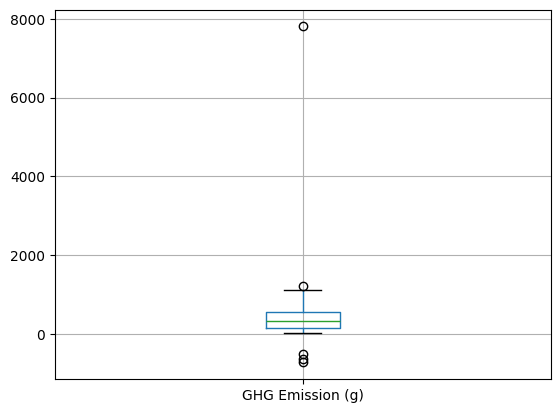

In [59]:
Products.boxplot(column=['GHG Emission (g)'], return_type='axes')

In [60]:
Products.boxplot(column=['N lost (g)'], return_type='axes')

<Axes: >

In [61]:
Products.boxplot(column=['Freshwater Withdrawals (L)'], return_type='axes')

<Axes: >

In [62]:
Products.boxplot(column=['Stress-Weighted Water Use (L)'], return_type='axes')

<Axes: >

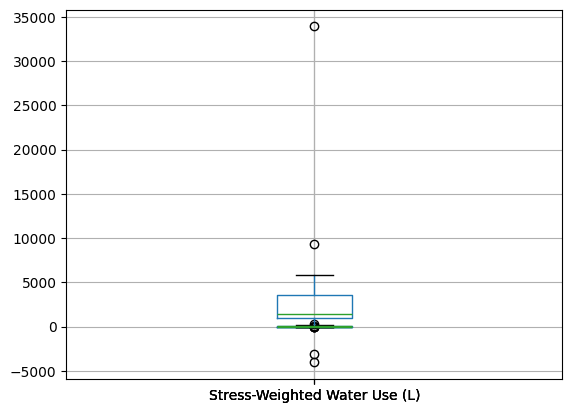

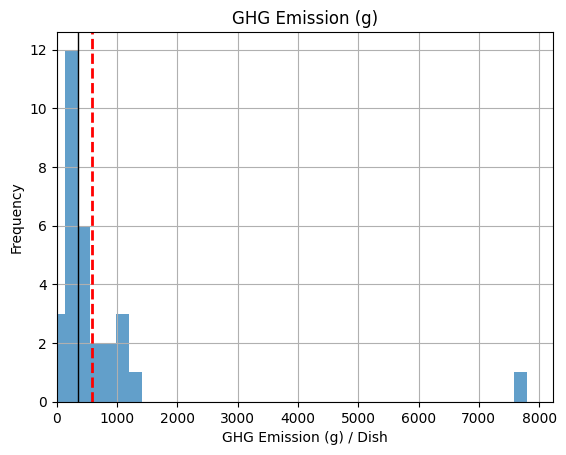

In [63]:
# These figures were not loading earlier because there were not any folders for the path required, so now that is working
Products.hist(column=['GHG Emission (g)'], bins= 40, alpha = 0.7)
plt.axvline(Products['GHG Emission (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['GHG Emission (g)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('GHG Emission (g) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'GHGe_dish.png')
plt.show()

In [64]:
# Using isna() or isnull() to find NaN values in 'GHG Emission (g) / 100g' column
rows_with_nan = Products[Products['GHG Emission (g) / 100g'].isna()]

# Display the rows containing NaN values
print(rows_with_nan)


Empty DataFrame
Columns: [ProdId, Description, SalesGroup, Weight (g), GHG Emission (g), N lost (g), Land Use (m^2), Freshwater Withdrawals (L), Stress-Weighted Water Use (L), GHG Emission (g) / 100g, N lost (g) / 100g, Freshwater Withdrawals (L) / 100g, Stress-Weighted Water Use (L) / 100g, Land Use (m^2) / 100g]
Index: []


In [65]:
# Products.hist(column=['N lost (g)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['N lost (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['N lost (g)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('N lost (g) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'N lost_dish.png')
# plt.show()

In [66]:
# Products.hist(column=['N lost (g) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['N lost (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['N lost (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('N lost (g) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'N lost_100g.png')
# plt.show()

In [67]:
# Products.hist(column=['Freshwater Withdrawals (L)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Freshwater Withdrawals (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Freshwater Withdrawals (L)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Freshwater Withdrawals (L) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Fresh water_dish.png')
# plt.show()

In [68]:
# Products.hist(column=['Freshwater Withdrawals (L) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Freshwater Withdrawals (L) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Fresh water_100g.png')
# plt.show()

In [69]:
# Products.hist(column=['Stress-Weighted Water Use (L)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Stress-Weighted Water Use (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Stress-Weighted Water Use (L)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Stress-Weighted Water Use (L) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Stress water_dish.png')
# plt.show()

In [70]:
# Products.hist(column=['Stress-Weighted Water Use (L) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Stress-Weighted Water Use (L) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Stress water_100g.png')
# plt.show()

In [71]:
# Products.hist(column=['Land Use (m^2)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Land Use (m^2)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Land Use (m^2)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Land Use (m^2) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Land_Use_(m^2).png')
# plt.show()

In [72]:
# Products.hist(column=['Land Use (m^2) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Land Use (m^2) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Land Use (m^2) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Land Use (m^2) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Land_Use_(m^2)_per_100g.png')
# plt.show()

In [73]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g
0,R-4593,$garlic & onion,Y,50.000000,7802.796944,32.354278,8.720772,32.37,33897.73,15605.59,64.71,64.74,67795.46,17.44
1,R-3266,CHEDDAR SLICE,Y,21.000000,187.118399,1.959300,0.219660,32.75,1689.73,891.04,9.33,155.95,8046.33,1.05
2,R-9348,Cucumber,Y,30.150000,282.514545,0.203512,0.934650,0.75,6.64,937.03,0.68,2.49,22.02,3.10
3,R-9085,Lettuce,Y,28.350000,17.633700,0.223965,0.065205,1.55,70.40,62.20,0.79,5.47,248.32,0.23
4,R-2489,Tomato,Y,50.000000,48.670000,0.337500,0.087000,2.19,17.48,97.34,0.68,4.38,34.96,0.17
5,R-1771,Bagel - Jalapeno Cheddar,Y,100.000000,152.250000,1.480000,0.489000,41.92,1282.17,152.25,1.48,41.92,1282.17,0.49
6,R-2796,BC SMOKE SALMON,Y,265.000000,981.001500,7.652550,1.910400,138.56,3622.42,370.19,2.89,52.29,1366.95,0.72
7,R-3621,Four Cheese Melt,Y,301.000000,1027.338399,6.833500,1.920860,107.82,5806.13,341.31,2.27,35.82,1928.95,0.64
8,R-7916,Lite Crm Chz,Y,50.000000,445.520000,4.665000,0.523000,77.96,4023.16,891.04,9.33,155.92,8046.32,1.05
9,R-10771,MELT - TUNA,Y,290.000000,1118.455000,12.131000,2.151500,263.69,3937.11,385.67,4.18,90.93,1357.62,0.74


In [74]:
Products.to_csv("data/preprocessed/AMS_data/Products_List.csv", index = False)
